## Observations and Insights

## Dependencies and starter code

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata,study_results,how="outer", on ="Mouse ID")

Combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
group_data = Combined_data.groupby("Drug Regimen" )

group_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


Mean_Tumor_Volume= group_data['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume=group_data['Tumor Volume (mm3)'].median()

variance = group_data['Tumor Volume (mm3)'].var()
Standarad_deviation = group_data['Tumor Volume (mm3)'].std()
SEM = group_data['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": Mean_Tumor_Volume,"Median Tumor Volume":Median_Tumor_Volume,"Variance":variance,"Standarad deviation":Standarad_deviation,"SEM":SEM  })
summary_statistics.head(10)



,Mean Tumor Volume,Median Tumor Volume,Variance,Standarad deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

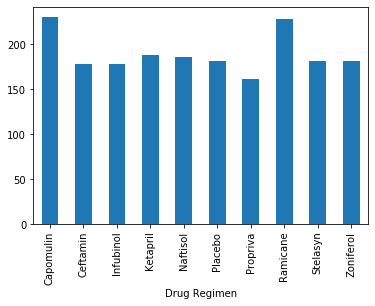

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_Drug_Regimen = group_data["Drug Regimen"].count()
count_Drug_Regimen.plot(kind="bar")



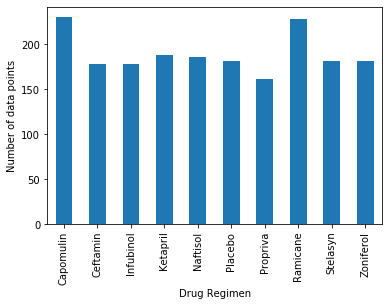

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using count_chart = count_Drug_Regimen.plot(kind='bar')
count_chart = count_Drug_Regimen.plot(kind='bar')
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of data points")
plt.show()
plt.tight_layout()

## Pie plots

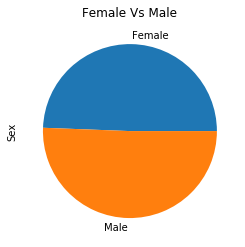

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Sex_data = Combined_data.groupby("Sex")
count_sex_data = Sex_data["Sex"].count()
plt.title("Female Vs Male")
count_sex_data.plot.pie()



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_data = Combined_data.groupby("Sex")
count_sex_data = Sex_data["Sex"].count()



data_frame = pd.DataFrame(count_sex_data)




C:\Users\Sidhuamber\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


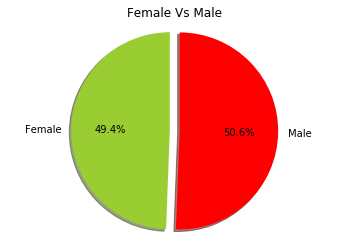

In [12]:
colors = ["yellowgreen", "red"]
Sex = ["Female","Male"]
explode = (0,0.1)
plt.title("Female Vs Male")
plt.pie(data_frame, explode=explode, colors=colors, labels = Sex, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Define Data



In [28]:
#Capomulin
Capomulin_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Capomulin",columns]
TV_Capomulin_data=Capomulin_data["Tumor Volume (mm3)"].sum()
TV_Capomulin_data

9355.42046243

In [23]:
#Ramicane
Ramicane_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Ramicane",columns]
TV_Ramicane_data=Ramicane_data["Tumor Volume (mm3)"].sum()
TV_Ramicane_data

9169.41787521

In [24]:
#Infubinol
Infubinol_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Infubinol",columns]
TV_Infubinol_data=Infubinol_data["Tumor Volume (mm3)"].sum()
TV_Infubinol_data

9413.49352933

In [26]:
#Ceftamin
Ceftamin_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Ceftamin",columns]
TV_Ceftamin_data=Ceftamin_data["Tumor Volume (mm3)"].sum()
TV_Ceftamin_data

9361.228582110001

In [22]:
Capomulin_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Capomulin",].groupby("Mouse ID").last()
Capomulin_data.head()
last_tumor_volume_Capomulin = Capomulin_data["Tumor Volume (mm3)"]

tumor_quantiles_Capomulin = last_tumor_volume_Capomulin.quantile([0.25,0.5,0.75])
lower_quantiles_Capomulin = tumor_quantiles_Capomulin[0.25]
upper_quantiles_Capomulin = tumor_quantiles_Capomulin[0.75]
iqr_Capomulin = upper_quantiles_Capomulin - lower_quantiles_Capomulin
lower_bound_Capomulin = lower_quantiles_Capomulin-iqr_Capomulin*1.5
upper_bound_Capomulin = upper_quantiles_Capomulin + iqr_Capomulin*1.5

summary_table_Capomulin =pd.DataFrame({"lower quantiles":[lower_quantiles_Capomulin,],
                                       "upper quantile":[upper_quantiles_Capomulin,],
                                       "IQR":[iqr_Capomulin,],
                                       "Lower Bound":[lower_bound_Capomulin,],
                                       "upper bound":[upper_bound_Capomulin,]})

print(summary_table_Capomulin)



   lower quantiles  upper quantile       IQR  Lower Bound  upper bound
0        32.377357        40.15922  7.781863    20.704562    51.832015


In [19]:
Ramicane_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Ramicane",].groupby("Mouse ID").last()
Ramicane_data.head()
last_tumor_volume_Ramicane = Ramicane_data["Tumor Volume (mm3)"]

#Calculating 
tumor_quantiles_Ramicane = last_tumor_volume_Ramicane.quantile([0.25,0.5,0.75])
lower_quantiles_Ramicane = tumor_quantiles_Ramicane[0.25]
upper_quantiles_Ramicane = tumor_quantiles_Ramicane[0.75]
iqr_Ramicane = upper_quantiles_Ramicane - lower_quantiles_Ramicane
lower_bound_Ramicane = lower_quantiles_Ramicane-iqr_Ramicane*1.5
upper_bound_Ramicane = upper_quantiles_Ramicane + iqr_Ramicane*1.5

summary_table_Ramicane =pd.DataFrame({"lower quantiles":[lower_quantiles_Ramicane,],
                                       "upper quantile":[upper_quantiles_Ramicane,],
                                       "IQR":[iqr_Ramicane,],
                                       "Lower Bound":[lower_bound_Ramicane,],
                                       "upper bound":[upper_bound_Ramicane,]})

print(summary_table_Ramicane)

   lower quantiles  upper quantile       IQR  Lower Bound  upper bound
0         31.56047       40.659006  9.098537    17.912664    54.306811


In [20]:
Infubinol_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Infubinol",].groupby("Mouse ID").last()
Infubinol_data.head()
last_tumor_volume_Infubinol = Infubinol_data["Tumor Volume (mm3)"]

#Calculating 
tumor_quantiles_Infubinol = last_tumor_volume_Infubinol.quantile([0.25,0.5,0.75])
lower_quantiles_Infubinol= tumor_quantiles_Infubinol[0.25]
upper_quantiles_Infubinol = tumor_quantiles_Infubinol[0.75]
iqr_Infubinol = upper_quantiles_Infubinol - lower_quantiles_Infubinol
lower_bound_Infubinol = lower_quantiles_Infubinol-iqr_Infubinol*1.5
upper_bound_Infubinol = upper_quantiles_Infubinol + iqr_Infubinol*1.5

summary_table_Infubinol =pd.DataFrame({"lower quantiles":[lower_quantiles_Infubinol,],
                                       "upper quantile":[upper_quantiles_Infubinol,],
                                       "IQR":[iqr_Infubinol,],
                                       "Lower Bound":[lower_bound_Infubinol,],
                                       "upper bound":[upper_bound_Infubinol,]})

print(summary_table_Infubinol)

   lower quantiles  upper quantile        IQR  Lower Bound  upper bound
0        54.048608       65.525743  11.477135    36.832905    82.741446


In [21]:
Ceftamin_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Ceftamin",].groupby("Mouse ID").last()
Ceftamin_data.head()
last_tumor_volume_Ceftamin = Ceftamin_data["Tumor Volume (mm3)"]

#Calculating 
tumor_quantiles_Ceftamin = last_tumor_volume_Ceftamin.quantile([0.25,0.5,0.75])
lower_quantiles_Ceftamin = tumor_quantiles_Ceftamin[0.25]
upper_quantiles_Ceftamin = tumor_quantiles_Ceftamin[0.75]
iqr_Ceftamin = upper_quantiles_Ceftamin - lower_quantiles_Ceftamin
lower_bound_Ceftamin = lower_quantiles_Ceftamin-iqr_Ceftamin*1.5
upper_bound_Ceftamin = upper_quantiles_Ceftamin + iqr_Ceftamin*1.5

summary_table_Ceftamin =pd.DataFrame({"lower quantiles":[lower_quantiles_Ceftamin,],
                                       "upper quantile":[upper_quantiles_Ceftamin,],
                                       "IQR":[iqr_Ceftamin,],
                                       "Lower Bound":[lower_bound_Ceftamin,],
                                       "upper bound":[upper_bound_Ceftamin,]})

print(summary_table_Ceftamin)

   lower quantiles  upper quantile        IQR  Lower Bound  upper bound
0        48.722078        64.29983  15.577752     25.35545    87.666458


TypeError: 'function' object is not subscriptable

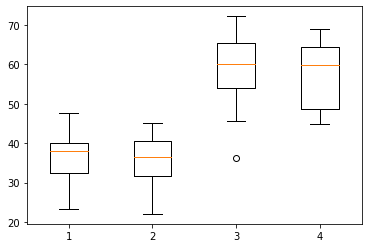

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

series = [last_tumor_volume_Capomulin,last_tumor_volume_Ramicane,last_tumor_volume_Infubinol,last_tumor_volume_Ceftamin]
test = plt.boxplot(series)
plt.xticks[1,2,3,4], ['Capomulin','Ramicane','Infubinol','Ceftamin']
plt.title("Top 4 Regimen by Final Tumor Volume")
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and scatter plots

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

columns = ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]
Capomulin_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Capomulin",columns]
Mouse_data = Capomulin_data.loc[Capomulin_data["Mouse ID"]=="s185",columns]
Mouse_data


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876
15,s185,Capomulin,25,33.949940
16,s185,Capomulin,30,32.959671
17,s185,Capomulin,35,28.328531
18,s185,Capomulin,40,25.472143
19,s185,Capomulin,45,23.343598


Text(0, 0.5, 'Tumor Volume')

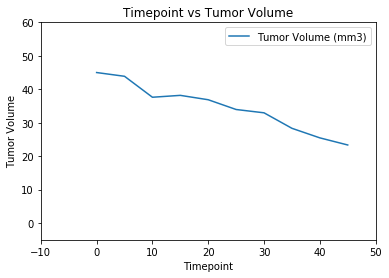

In [47]:
Mouse_data.plot("Timepoint","Tumor Volume (mm3)")
plt.xlim(-10,50)
plt.ylim(-5,60)
plt.title("Timepoint vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

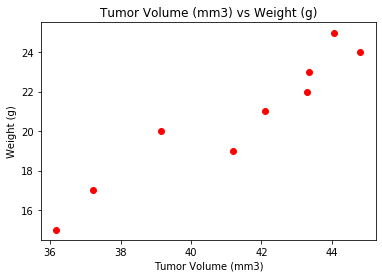

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

columns = ["Drug Regimen","Weight (g)","Tumor Volume (mm3)"]
Capomulin_data = Combined_data.loc[Combined_data["Drug Regimen"]== "Capomulin",columns]

data = Capomulin_data.groupby("Weight (g)")

data = data["Tumor Volume (mm3)"].mean()
data = data.reset_index()

plt.scatter(data['Tumor Volume (mm3)'], data['Weight (g)'], marker="o", color="red")
plt.title("Tumor Volume (mm3) vs Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")


plt.show()



The correlation between both factors is 0.95


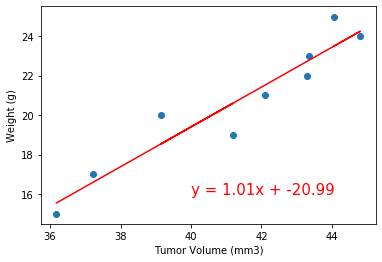

In [49]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


Weight_data  = data.iloc[:,0]
Tumor_Volume = data.iloc[:,1]


correlation =st.pearsonr(Weight_data ,Tumor_Volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = data['Tumor Volume (mm3)']
y_values = data['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(40,16),fontsize=15,color="red")

plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

plt.show()

